%%html
<style>
div.input {
    display:none;
}
</style>

## Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set()

## Data Cleaning

In [3]:
raw_data = pd.read_csv('get-orders-2018.csv')
raw_data.head()

,bc_get_order_number,bc_dining_order_number,date_order_completed,day_order_completed,time_order_received,time_order_delivered,customer_name,customer_location,phone_number,order_pickup_location,...,geter_id.1,email,first_name,last_name,is_admin,salt,encrypted_password,grad_year,reset_token,reset_token_expires
0,1,7150,8/28/18,Tuesday,19:24:00,19:45:00,GABRIELLA M SAN GIOVANNI,"Ignacio, Room A15",305-905-4808,Hillside,...,2,bruggemj@bc.edu,JB,Bruggeman,t,6887159b,8d8718ed2ae58a05cfcf322b337362dd60d34f61bc5c9f...,2019.0,NaN,NaN
1,2,7180,8/29/18,Wednesday,12:13:00,12:32:00,KELSEY C LALLY,"Voute, Room 306",610-551-5131,Hillside,...,3,quinnap@bc.edu,Megan,Quinn,t,0f897cde,c4ff72007c623610d987928405d0e100680832b74d82f5...,2019.0,NaN,NaN
2,3,7260,8/30/18,Thursday,13:46:00,14:29:00,CODY SHAMON,"Rubenstein, Room C52",954-319-6212,Hillside,...,7,wangbrh@bc.edu,Roger,Wang,f,af45abe3,5ee45a73f4ce112c5b3536cf3f9937f69741d4d8943691...,2021.0,NaN,NaN
3,4,7297,8/31/18,Friday,12:44:00,13:09:00,GRACE M FOLEY,"Ignacio, Room A12",847-596-1400,Hillside,...,3,quinnap@bc.edu,Megan,Quinn,t,0f897cde,c4ff72007c623610d987928405d0e100680832b74d82f5...,2019.0,NaN,NaN
4,5,7302,8/31/18,Friday,19:08:00,19:38:00,JEFFREY Q STAUTBERG,"Rubenstein, Room D13",484-844-0432,CoRo,...,2,bruggemj@bc.edu,JB,Bruggeman,t,6887159b,8d8718ed2ae58a05cfcf322b337362dd60d34f61bc5c9f...,2019.0,NaN,NaN


In [4]:
def clean_time(x):
    tempx = x
    if tempx == '' or tempx != tempx:
        tempx = '0:00:00'
    if int(tempx.split(':')[0]) > 23:
        tempx = '0' + tempx[2:]
    return pd.to_datetime(tempx)

In [5]:
to_drop = ['bc_get_order_number','bc_dining_order_number','geter_id','geter_id.1','is_admin', 'salt', 'encrypted_password', 'grad_year', 'reset_token', 'reset_token_expires']
data = raw_data.drop(to_drop, axis=1)

data = data.rename(columns={'date_order_completed':'order_date','time_order_received':'time_received','time_order_delivered':'time_delivered'})

data.order_date = data.order_date.apply(lambda x: pd.to_datetime(x, format='%m/%d/%y'))

data.time_received = data.time_received.apply(lambda x: clean_time(x))
data.time_delivered = data.time_delivered.apply(lambda x: clean_time(x))

## Analysis

<BarContainer object of 14 artists>

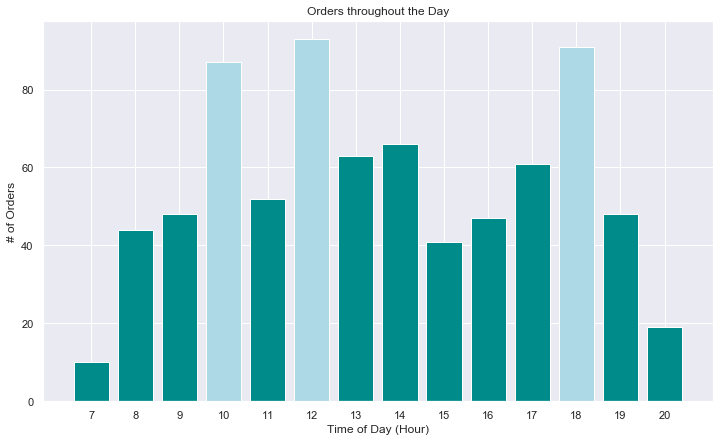

In [30]:
fig = plt.figure(figsize=(12,7))

orders_by_hour = data.groupby(data.time_received.dt.hour).order_date.count()[2:]
plt.xticks([7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.xlabel('Time of Day (Hour)')
plt.ylabel('# of Orders')
plt.title('Orders throughout the Day')
colors = ['darkcyan']*3 + ['lightblue'] + ['darkcyan'] + ['lightblue'] + ['darkcyan']*5 + ['lightblue']
plt.bar(orders_by_hour.index,orders_by_hour.values, color=colors)

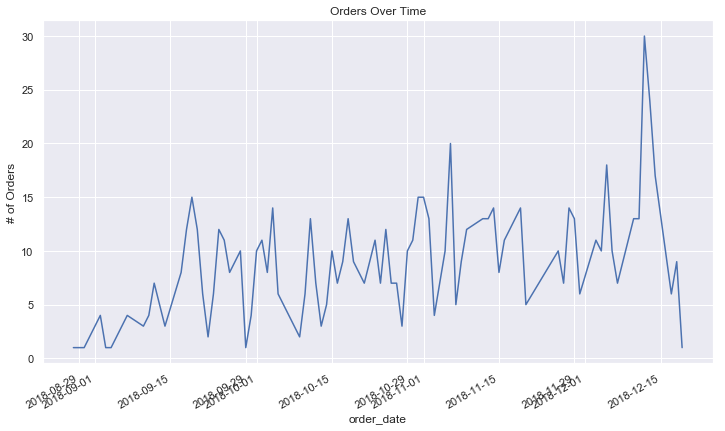

In [31]:
orders_by_day = data.groupby('order_date').day_order_completed.count().values
dates = data.groupby('order_date').day_order_completed.count().index

fig = plt.figure(figsize=(12,7))
plt.title('Orders Over Time')
plt.ylabel('# of Orders')
fig.autofmt_xdate()
sns.lineplot(dates, orders_by_day)

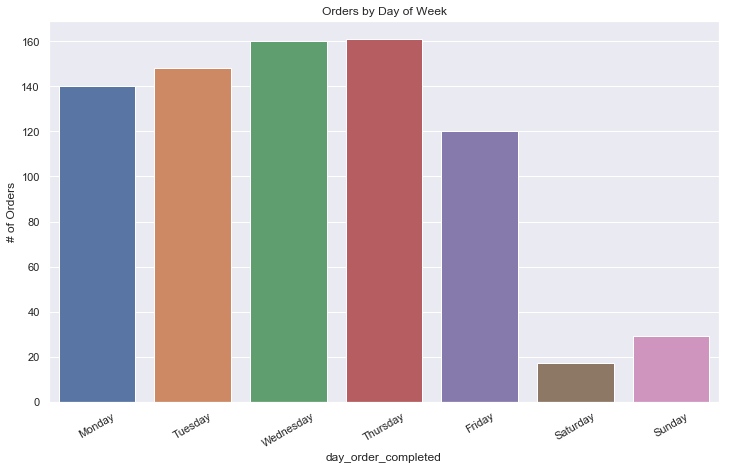

In [8]:
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_by_weekday = data.groupby('day_order_completed').order_date.count().reindex(days_order).values
days_of_week = data.groupby('day_order_completed').order_date.count().reindex(days_order).index

fig = plt.figure(figsize=(12,7))

plt.title('Orders by Day of Week')
plt.ylabel('# of Orders')
plt.xticks(rotation=30)
sns.barplot(days_of_week, order_by_weekday)

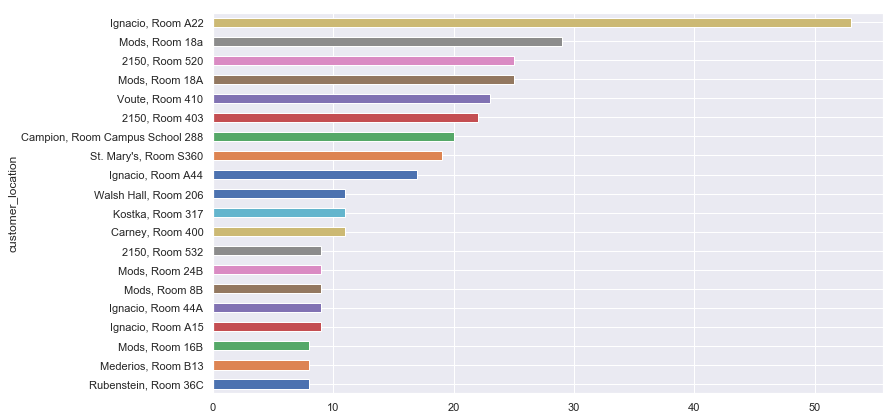

In [9]:
orders_by_location = data.groupby('customer_location').count().sort_values('order_date',ascending=False).order_date.head(20).sort_values()
fig = plt.figure(figsize=(12,7))
orders_by_location.plot(kind='barh')

In [10]:
data.groupby('customer_location').count().sort_values('order_date',ascending=False).order_date.head(20).sort_values()

customer_location
Rubenstein, Room 36C                8
Mederios, Room B13                  8
Mods, Room 16B                      8
Ignacio, Room A15                   9
Ignacio, Room 44A                   9
Mods, Room 8B                       9
Mods, Room 24B                      9
2150, Room 532                      9
Carney, Room 400                   11
Kostka, Room 317                   11
Walsh Hall, Room 206               11
Ignacio, Room A44                  17
St. Mary's, Room S360              19
Campion, Room Campus School 288    20
2150, Room 403                     22
Voute, Room 410                    23
Mods, Room 18A                     25
2150, Room 520                     25
Mods, Room 18a                     29
Ignacio, Room A22                  53
Name: order_date, dtype: int64

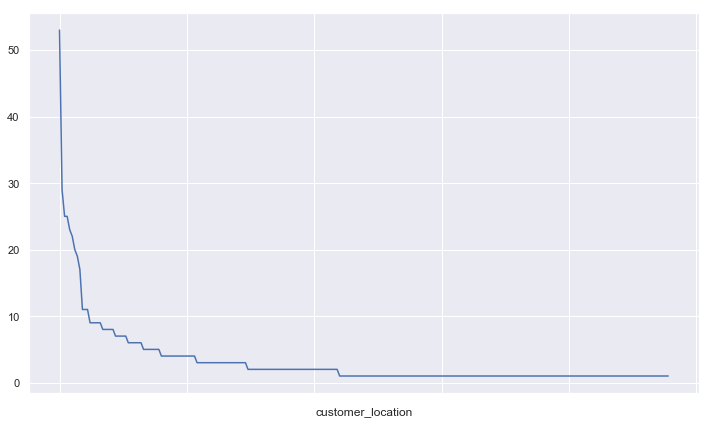

In [11]:
orders_by_location = data.groupby('customer_location').count().sort_values('order_date',ascending=False).order_date
fig = plt.figure(figsize=(12,7))
orders_by_location.plot()